In [65]:
import glob
from scipy import sparse, stats, spatial
import scipy.sparse.linalg
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing, decomposition
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize": (20, 10)})
sns.set_palette(sns.color_palette("Set2", 10))
%matplotlib inline

In [2]:
emails_path = glob.glob('enron_with_categories/*/*.txt')
labels_path = glob.glob('enron_with_categories/*/*.cats')
print(f"{len(emails_path)} emails and {len(labels_path)} labels")

1702 emails and 1702 labels


In [3]:
def prepocess(email):
    return 

def readEmail(path):
    return open(path, 'r').read()
#print(readEmail(emails[0]))
def readEmails(paths):
    emails = []
    for path in paths:
        emails.append(readEmail(path))
    return emails
emails = readEmails(emails_path)

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
features = vectorizer.fit_transform(emails)
features = features.todense()

In [29]:
distances = spatial.distance.squareform(spatial.distance.pdist(features, metric='cosine'))
np.unravel_index(np.argmax(dist), distances.shape)

(738, 1698)

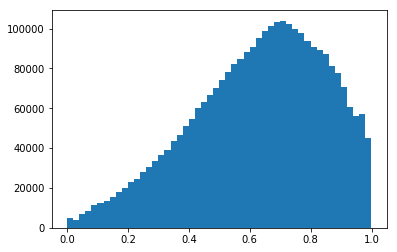

In [30]:
plt.hist(distances.reshape(-1), bins=50);

In [31]:
kernel_width = distances.mean()
weights = np.exp((-1*(distances**2))/(kernel_width**2))# Your code here.

# Your code here.
np.fill_diagonal(weights, 0)

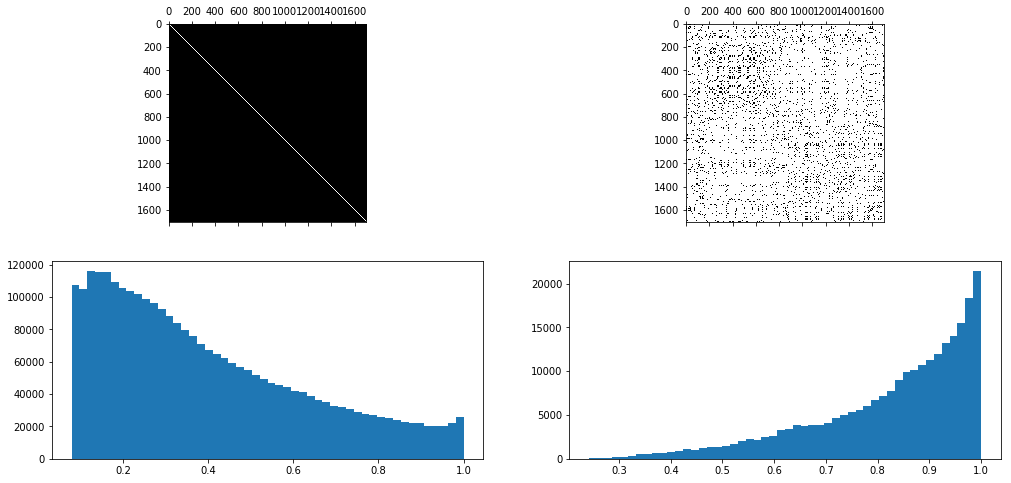

In [33]:
#sparsify the graph (because it was fully connected)
fix, axes = plt.subplots(2, 2, figsize=(17, 8))
def plot(weights, axes):
    axes[0].spy(weights)
    axes[1].hist(weights[weights > 0].reshape(-1), bins=50);
plot(weights, axes[:, 0])

weights_ = weights.copy()
NEIGHBORS = 100
# Your code here.

for i in range(1702):
    temp = weights[i]
    temp = np.argpartition((-temp), NEIGHBORS)[NEIGHBORS:]
    weights_[i][temp] = 0

weights = weights_.copy()

bigger = weights.transpose() > weights
weights = weights - bigger*weights + weights.transpose()*bigger

plot(weights, axes[:, 1])

In [35]:
import networkx as nx
G = nx.Graph(weights)

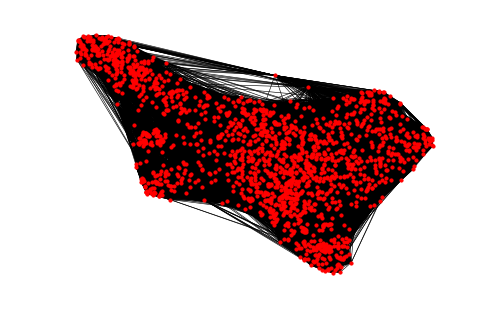

In [36]:
nx.draw(G, node_size=10, width=0.6)

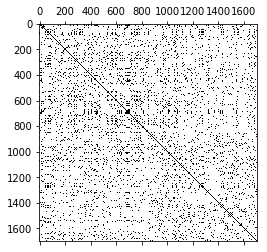

In [38]:
degrees_weighted = np.sum(weights, axis=1)# Your code here.
#Graph laplacian
laplacian = np.diag(degrees_weighted) - weights # Your code here.

#normalizing the laplacian
deg_inv_square = np.diag(degrees_weighted**(-0.5))
laplacian = deg_inv_square @ laplacian @ deg_inv_square

plt.spy(laplacian);

In [72]:
eigenvalues, eigenvectors = sparse.linalg.eigsh(laplacian, 100, which='SM')# Your code here. #which='SA'

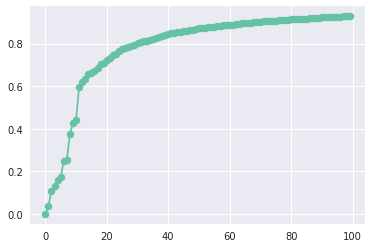

In [73]:
plt.plot(eigenvalues, '.-', markersize=15);

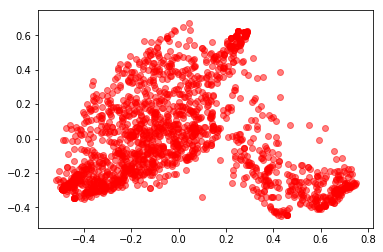

In [44]:
features_pca = decomposition.PCA(n_components=2).fit_transform(features)
#genres = preprocessing.LabelEncoder().fit_transform(tracks['genre'])
plt.scatter(features_pca[:, 0], features_pca[:, 1], c='r', cmap='RdBu', alpha=0.5);

-0.0237925791309


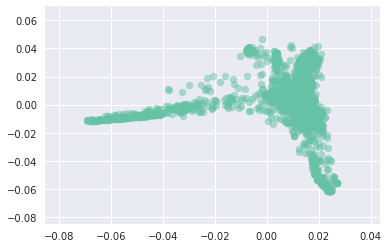

In [67]:
x = eigenvectors[:,1]# Your code here.
y = eigenvectors[:,2]# Your code here.
plt.scatter(x, y, cmap='RdBu', alpha=0.5);
print(np.mean(eigenvectors[:,0]))

-0.0237925791309


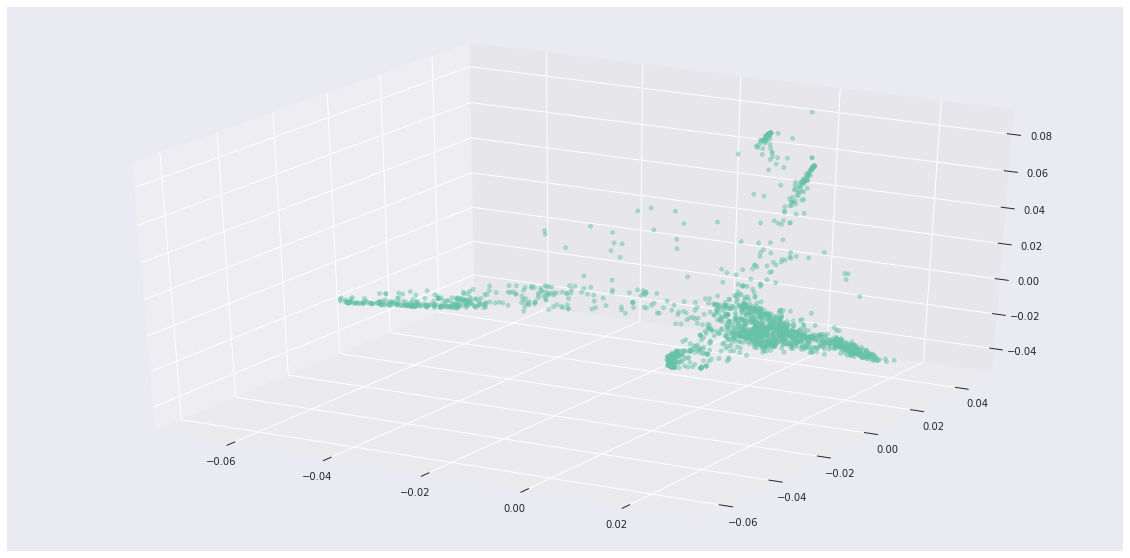

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

x = eigenvectors[:,1]# Your code here.
y = eigenvectors[:,2]# Your code here.
z = eigenvectors[:,3]# Your code here.
ax.scatter(x, y, z, cmap='RdBu', alpha=0.5);
print(np.mean(eigenvectors[:,0]))

In [20]:
emails_path[738]

'enron_with_categories/3/114495.txt'

In [21]:
print(emails[1698])

Message-ID: <11509554.1075847616234.JavaMail.evans@thyme>
Date: Sun, 25 Mar 2001 10:09:00 -0800 (PST)
From: steven.kean@enron.com
To: shelley.corman@enron.com
Subject: Notice of CPUC gas infrastructure workshop
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Steven J Kean
X-To: Shelley Corman
X-cc: 
X-bcc: 
X-Folder: \Steven_Kean_June2001_1\Notes Folders\All documents
X-Origin: KEAN-S
X-FileName: skean.nsf

fyi
----- Forwarded by Steven J Kean/NA/Enron on 03/25/2001 06:08 PM -----

	Jeff Dasovich
	Sent by: Jeff Dasovich
	03/24/2001 04:26 PM
		 
		 To: Alan Comnes/PDX/ECT@ECT, Angela Schwarz/HOU/EES@EES, Beverly 
Aden/HOU/EES@EES, Bill Votaw/HOU/EES@EES, Brenda Barreda/HOU/EES@EES, Carol 
Moffett/HOU/EES@EES, Cathy Corbin/HOU/EES@EES, Chris H Foster/HOU/ECT@ECT, 
Christina Liscano/HOU/EES@EES, Craig H Sutter/HOU/EES@EES, Dan 
Leff/HOU/EES@EES, Debora Whitehead/HOU/EES@EES, Dennis Benevides/HOU/EES@EES, 
Don Black/HOU/EES@EES, Dorothy 

In [ ]:
def create_agency_matrix():
    